In [33]:
import os
import numpy as np
import pandas as pd
import scipy.io

import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interactive
%matplotlib inline

## Load data

In [20]:
meta = pd.read_excel('C:/Users/lan/Documents/repos/inter/mat/adp_JBG_san.xlsx', index_col=None, header=None)
meta = meta.transpose().drop([0])
meta.columns = ['mouse', 'date', 'area']
meta = meta.reset_index()

In [25]:
del trace
del trace_flat

In [29]:
trace_align['trace_avg'].shape[-1]

267

In [ ]:
# from tensorflow.python.keras.preprocessing.sequence import pad_sequences
# result = pad_sequences(imgs, padding='post')

In [35]:
nset = len(meta.index); ncell = []; nori = 8; nisi = 3
dir_name = 'C:\\Users\\lan\\Documents\\repos\\inter\\mat\\'

vis_ad = np.empty([0,1]); vis_tg = np.empty([0,1]); well_fit = np.empty([0,1])
ori_pref = np.empty([0,nisi]); fit_param = np.empty([0,7,nisi])
dfof_ad = np.empty([0,1]); dfof_tg = np.empty([0,nori,nisi])
dfof_ad_std = np.empty([0,1]); dfof_tg_std = np.empty([0,nori,nisi])

for iset in np.arange(nset):
    dir_sub = str(meta.area[iset]) + '_i' + str(meta.mouse[iset]) + '_' + str(meta.date[iset])

    cell_prop = scipy.io.loadmat(os.path.join(dir_name, dir_sub, 'cell_property_loose' + '.mat'))
    dfof = scipy.io.loadmat(os.path.join(dir_name, dir_sub, 'dfof' + '.mat'))
    trace_align = scipy.io.loadmat(os.path.join(dir_name, dir_sub, 'trace_aligned' + '.mat'))
#     nframe_trial = trace_align['trace_avg'].shape[-1]; 
#     trace = np.empty([0,nori,nisi,nframe_trial])
    fit_tuning = scipy.io.loadmat(os.path.join(dir_name, dir_sub, 'fit_tuning_isi3' + '.mat'))
    
    ncell.append(len(cell_prop['vis_cell_ad']))    
    vis_ad = np.concatenate((vis_ad, cell_prop['vis_cell_ad']), axis=0)
    vis_tg = np.concatenate((vis_tg, cell_prop['vis_cell_noad_tg']), axis=0)
    well_fit = np.concatenate((well_fit, cell_prop['well_fit_cell']), axis=0)
    
    ori_pref = np.concatenate((ori_pref, cell_prop['ori_pref']), axis=0)
    fit_param = np.concatenate((fit_param, fit_tuning['fit_param']), axis=0)

    dfof_ad = np.concatenate((dfof_ad, dfof['dfof_ad']), axis=0)
    dfof_ad_std = np.concatenate((dfof_ad_std, dfof['dfof_ad_std']), axis=0)
    dfof_tg = np.concatenate((dfof_tg, dfof['dfof_tg']), axis=0)
    dfof_tg_std = np.concatenate((dfof_tg_std, dfof['dfof_tg_std']), axis=0)
    
#     trace_flat = np.empty([ncell[iset],nori,nisi,nframe_trial]);
#     for icell in np.arange(ncell[iset]):
#         for iori in np.arange(nori):
#             for iisi in np.arange(nisi):
#                 trace_flat[icell][iori][iisi][:] = trace_align['trace_avg'][icell][iori][iisi].flatten()
#     trace = np.vstack((trace,trace_flat))

ncell, vis_ad.shape, vis_tg.shape, well_fit.shape, ori_pref.shape, fit_param.shape, dfof_ad.shape, dfof_tg.shape
# trace.shape

([73, 19, 73, 31, 33, 43, 94, 55, 16, 35, 66, 49],
 (587, 1),
 (587, 1),
 (587, 1),
 (587, 3),
 (587, 7, 3),
 (587, 1),
 (587, 8, 3))

In [36]:
meta['ncell'] = ncell
# meta = meta.replace({'area' : { 'V1':1, 'LM':2, 'LI':3 }})
meta

,index,mouse,date,area,ncell
0,1,674,170324,V1,73
1,2,689,170323,V1,19
2,3,696,170323,V1,73
3,4,684,170327,V1,31
4,5,711,170503,V1,33
5,6,712,170503,V1,43
6,7,574,170510,V1,94
7,8,720,170808,V1,55
8,9,738,170810,V1,16
9,10,739,170811,V1,35


In [37]:
mouse_cell = [item for item, count in zip(meta.mouse, meta.ncell) for i in range(count)]
area_cell = [item for item, count in zip(meta.area, meta.ncell) for i in range(count)]
meta_cell = pd.DataFrame({'mouse': mouse_cell, 'area': area_cell})
meta_cell

,mouse,area
0,674,V1
1,674,V1
2,674,V1
3,674,V1
4,674,V1
...,...,...
582,746,V1
583,746,V1
584,746,V1
585,746,V1


## Adaptation magnitude

adaptation mag = response to target ori==0 with adapter / response to adapter - 1  
cell selection: vis_ad only, no dfof_ad thresholding

In [38]:
adp_mag = dfof_tg[:,0,[1,2]] / dfof_ad - 1

meta_cell_750 = meta_cell.copy(); meta_cell_750['isi'] = 750
meta_cell_250 = meta_cell.copy(); meta_cell_250['isi'] = 250
meta_cell_isi = pd.concat([meta_cell_750, meta_cell_250], ignore_index=True)

df_adp_mag = meta_cell_isi.copy()
df_adp_mag['adp_mag'] = adp_mag.flatten('F')
df_adp_mag['dfof_ad'] = np.concatenate((dfof_ad, dfof_ad), axis=0)

df_adp_mag['vis_ad'] = np.concatenate((vis_ad, vis_ad), axis=0)
df_adp_mag = df_adp_mag[ df_adp_mag['vis_ad'] == 1 ]
df_adp_mag.reset_index()

,index,mouse,area,isi,adp_mag,dfof_ad,vis_ad
0,0,674,V1,750,-0.945808,0.024310,1.0
1,1,674,V1,750,-0.712873,0.128426,1.0
2,2,674,V1,750,-0.778090,0.076076,1.0
3,3,674,V1,750,-1.851109,0.014346,1.0
4,4,674,V1,750,-0.138847,0.057426,1.0
...,...,...,...,...,...,...,...
1033,1169,746,V1,250,0.304692,0.033276,1.0
1034,1170,746,V1,250,-1.295881,0.036616,1.0
1035,1171,746,V1,250,-2.399299,0.014843,1.0
1036,1172,746,V1,250,-1.488585,0.043411,1.0


In [39]:
df_adp_mag[['adp_mag','area','isi']].groupby(['area','isi'], sort=False).describe()

adp_mag                                                              \
           count      mean       std       min       25%       50%       75%   
area isi                                                                       
V1   750   519.0 -0.311450  0.977531 -5.536604 -0.750985 -0.360654  0.062258   
     250   519.0 -0.468646  0.964485 -4.323486 -0.933541 -0.569552 -0.082537   

                    
               max  
area isi            
V1   750  4.693942  
     250  5.048415

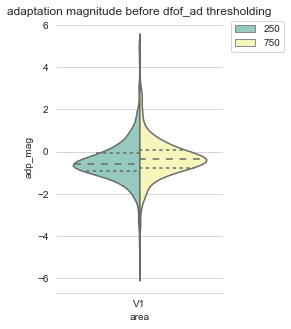

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(3,5))
ax = sns.violinplot(data=df_adp_mag, x="area", y="adp_mag", hue="isi",
               split=True, inner="quart", palette="Set3")
sns.despine(left=True)
ax.set(title = 'adaptation magnitude before dfof_ad thresholding')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### add dfof_ad thresholding

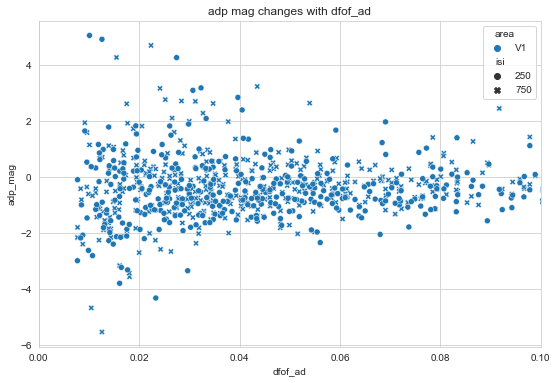

In [43]:
plt.figure(figsize=(9,6))
ax = sns.scatterplot(data=df_adp_mag, x="dfof_ad", y="adp_mag", hue="area", style="isi")
# plt.xlim([0,0.8]);
plt.xlim([0,0.1]);
ax.set(title = 'adp mag changes with dfof_ad');

In [44]:
df = df_adp_mag.sort_values(by=['dfof_ad'])
df1 = df[df.isi == 750]
df2 = df[df.isi == 250]

def f(win):
    plt.figure(figsize=(15,5))
    plt.plot(df1.dfof_ad, df1['adp_mag'].rolling(win, min_periods=1).mean(), alpha=0.7)
    plt.plot(df2.dfof_ad, df2['adp_mag'].rolling(win, min_periods=1).mean(), alpha=0.7)
    plt.legend(['isi = 750', 'isi = 250'])
    plt.xlim([0,0.1])
    plt.xlabel('dfof_ad')
    plt.ylabel('adaptation mag rolling mean')
    plt.title('adp mag rolling mean change with dfof_ad of cells')
    plt.show()

interactive_plot = interactive(f, win=(2, 20))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=11, description='win', max=20, min=2), Output(layout=Layout(height='350p…

In [45]:
def f(win):
    plt.figure(figsize=(15,5))
    plt.plot(df1.dfof_ad, df1['adp_mag'].rolling(win, min_periods=1).std(), alpha=0.7)
    plt.plot(df2.dfof_ad, df2['adp_mag'].rolling(win, min_periods=1).std(), alpha=0.7)
    plt.legend(['isi = 750', 'isi = 250'])
    plt.xlim([0,0.1])
    plt.xlabel('dfof_ad')
    plt.ylabel('adaptation mag rolling std')
    plt.title('adp mag rolling std change with dfof_ad of cells')
    plt.show()

interactive_plot = interactive(f, win=(2, 20))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=11, description='win', max=20, min=2), Output(layout=Layout(height='350p…

cell selection: vis_ad only, with dfof_ad thresholding

In [46]:
dfof_threshold = 0.03
df_adp_mag_thres = df_adp_mag[df_adp_mag.dfof_ad >= dfof_threshold]
df_adp_mag_thres.reset_index()

,index,mouse,area,isi,adp_mag,dfof_ad,vis_ad
0,1,674,V1,750,-0.712873,0.128426,1.0
1,2,674,V1,750,-0.778090,0.076076,1.0
2,4,674,V1,750,-0.138847,0.057426,1.0
3,5,674,V1,750,2.621155,0.034737,1.0
4,6,674,V1,750,0.034073,0.098862,1.0
...,...,...,...,...,...,...,...
771,1165,746,V1,250,-0.465588,0.162974,1.0
772,1166,746,V1,250,-1.246575,0.083152,1.0
773,1169,746,V1,250,0.304692,0.033276,1.0
774,1170,746,V1,250,-1.295881,0.036616,1.0


In [47]:
df_adp_mag_thres[['adp_mag','area','isi']].groupby(['area','isi'], sort=False).describe()

adp_mag                                                              \
           count      mean       std       min       25%       50%       75%   
area isi                                                                       
V1   750   388.0 -0.287144  0.703751 -2.369330 -0.669285 -0.350254 -0.033557   
     250   388.0 -0.446104  0.722878 -2.344794 -0.832535 -0.563839 -0.171395   

                    
               max  
area isi            
V1   750  3.227168  
     250  3.176813

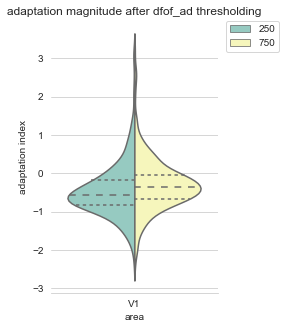

In [48]:
sns.set_style("whitegrid")
plt.figure(figsize=(3,5))
ax = sns.violinplot(data=df_adp_mag_thres, x="area", y="adp_mag", hue="isi",
               split=True, inner="quart", palette="Set3")
sns.despine(left=True)
ax.set(ylabel = 'adaptation index', title = 'adaptation magnitude after dfof_ad thresholding');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

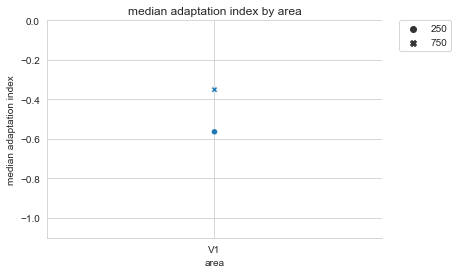

In [49]:
t = df_adp_mag_thres.copy()
tt = t[['adp_mag','area','isi']].groupby(['area','isi'], sort=False).median().reset_index()

ax = sns.scatterplot(data=tt, x="area", y="adp_mag", style="isi"); sns.despine()
ax.set(ylabel = 'median adaptation index', title = 'median adaptation index by area')
plt.ylim([-1.1,0])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

## Adaptation tuning bias

In [50]:
tt = ori_pref.copy()
tt[tt > 90] = np.abs(tt[tt > 90] - 180)
tuning_bias = tt[:,[1,2]] - tt[:,[0]];

ori_pref_bin = tt[:,[0]];
ori_pref_bin[ori_pref_bin < 22.5] = 0; ori_pref_bin[ori_pref_bin > 67.5] = 90; 
ori_pref_bin[(ori_pref_bin >= 22.5) & (ori_pref_bin <= 67.5)] = 45; 

In [55]:
df_adp_tune = meta_cell_isi.copy()
df_adp_tune['tuning_bias'] = tuning_bias.flatten('F')
df_adp_tune['ori_pref_bin'] = np.concatenate((ori_pref_bin, ori_pref_bin), axis=0)

df_adp_tune['vis_ad'] = np.concatenate((vis_ad, vis_ad), axis=0)
df_adp_tune['well_fit'] = np.concatenate((well_fit, well_fit), axis=0)
df_adp_tune = df_adp_tune[ df_adp_tune['vis_ad'] == 1 ]
df_adp_tune = df_adp_tune[ df_adp_tune['well_fit'] == 1 ]

b, c = df_adp_tune.iloc[0].copy(), df_adp_tune.iloc[1].copy() 
df_adp_tune.iloc[0], df_adp_tune.iloc[1] = c, b 
b, c = df_adp_tune.iloc[1].copy(), df_adp_tune.iloc[4].copy() 
df_adp_tune.iloc[1], df_adp_tune.iloc[4] = c, b # swap row 0 & 1 to sort df.gb properly
df_adp_tune.reset_index()

,index,mouse,area,isi,tuning_bias,ori_pref_bin,vis_ad,well_fit
0,0,674,V1,750,35.105464,0.0,1.0,1.0
1,1,674,V1,750,-29.946198,45.0,1.0,1.0
2,3,674,V1,750,9.713098,90.0,1.0,1.0
3,10,674,V1,750,-5.593403,90.0,1.0,1.0
4,17,674,V1,750,-2.745160,90.0,1.0,1.0
...,...,...,...,...,...,...,...,...
313,1154,746,V1,250,2.430006,90.0,1.0,1.0
314,1155,746,V1,250,-11.193302,90.0,1.0,1.0
315,1158,746,V1,250,31.084138,45.0,1.0,1.0
316,1163,746,V1,250,1.603095,45.0,1.0,1.0


In [56]:
df_adp_tune[['tuning_bias','area','isi','ori_pref_bin']].groupby(['area','isi','ori_pref_bin'], sort=False).describe()

tuning_bias                                             \
                            count       mean        std        min       25%   
area isi ori_pref_bin                                                          
V1   750 0.0                 24.0  10.127324  16.158927 -16.782575  0.829336   
         45.0                50.0  -0.997976  22.353046 -59.978129 -8.229333   
         90.0                85.0  -3.924340  12.903061 -60.728906 -5.593403   
     250 0.0                 24.0  15.345506  19.496816  -7.782131  0.745074   
         45.0                50.0   4.092941  18.198475 -62.607461 -2.329379   
         90.0                85.0  -4.714606  13.413453 -68.839979 -7.980587   

                                                       
                            50%        75%        max  
area isi ori_pref_bin                                  
V1   750 0.0           7.791919  17.796990  49.642819  
         45.0          2.057600  13.274745  46.566196  
         90.0         -1.115846   3.052067  21.631629  
     250 0.0           7.717831  27.243321  57.605464  
         45.0          4.903869   9.774685  54.964302  
         90.0         -2.236066   4.276781  15.792239

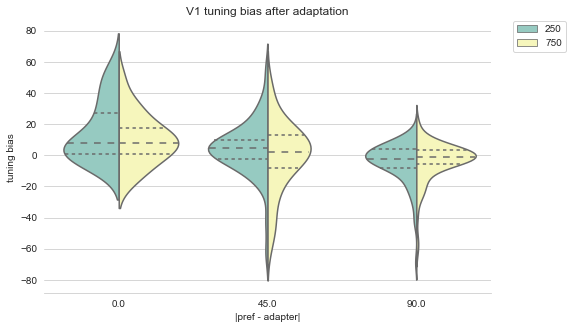

In [58]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.violinplot(data=df_adp_tune[df_adp_tune.area == 'V1'], 
                    x="ori_pref_bin", y="tuning_bias", hue="isi", 
                    split=True, inner="quart", palette="Set3")
sns.despine(left=True)
ax.set(xlabel = '|pref - adapter|', ylabel = 'tuning bias', title = 'V1 tuning bias after adaptation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

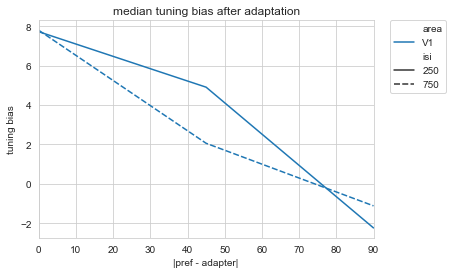

In [59]:
tt = df_adp_tune[['tuning_bias','area','isi','ori_pref_bin']].groupby(['area','isi','ori_pref_bin'], sort=False).median().reset_index()

ax = sns.lineplot(data=tt, x="ori_pref_bin", y="tuning_bias", hue="area", style="isi");
ax.set(xlabel = '|pref - adapter|', ylabel = 'tuning bias', title = 'median tuning bias after adaptation')
plt.xlim([0,90])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

#### Adaptation magnitude across |pref - ad|

In [76]:
df_adp_dist_mag = meta_cell_isi.copy()
df_adp_dist_mag['tuning_bias'] = tuning_bias.flatten('F')
df_adp_dist_mag['ori_pref_bin'] = np.concatenate((ori_pref_bin, ori_pref_bin), axis=0)

df_adp_dist_mag['vis_ad'] = np.concatenate((vis_ad, vis_ad), axis=0)
df_adp_dist_mag['well_fit'] = np.concatenate((well_fit, well_fit), axis=0)

adp_mag = dfof_tg[:,0,[1,2]] / dfof_ad - 1
df_adp_dist_mag['adp_mag'] = adp_mag.flatten('F')
df_adp_dist_mag['dfof_ad'] = np.concatenate((dfof_ad, dfof_ad), axis=0)

df_adp_dist_mag = df_adp_dist_mag[ df_adp_dist_mag['vis_ad'] == 1 ]
df_adp_dist_mag = df_adp_dist_mag[ df_adp_dist_mag['well_fit'] == 1 ]
dfof_threshold = 0.03
df_adp_dist_mag = df_adp_dist_mag[ df_adp_dist_mag.dfof_ad >= dfof_threshold ]

b, c = df_adp_dist_mag.iloc[1].copy(), df_adp_dist_mag.iloc[2].copy() 
df_adp_dist_mag.iloc[1], df_adp_dist_mag.iloc[2] = c, b # swap row 0 & 1 to sort df.gb properly
df_adp_dist_mag.reset_index()

,index,mouse,area,isi,tuning_bias,ori_pref_bin,vis_ad,well_fit,adp_mag,dfof_ad
0,1,674,V1,750,35.105464,0.0,1.0,1.0,-0.712873,0.128426
1,10,674,V1,750,-29.946198,45.0,1.0,1.0,0.505074,0.046656
2,17,674,V1,750,-5.593403,90.0,1.0,1.0,0.545769,0.033414
3,83,689,V1,750,2.416514,0.0,1.0,1.0,-0.027704,0.154916
4,92,696,V1,750,-13.685371,90.0,1.0,1.0,-0.350311,0.044330
...,...,...,...,...,...,...,...,...,...,...
209,1101,745,V1,250,-1.739969,0.0,1.0,1.0,-0.445620,0.091719
210,1146,746,V1,250,-68.839979,90.0,1.0,1.0,0.552208,0.035885
211,1147,746,V1,250,22.922387,45.0,1.0,1.0,-0.648442,0.034738
212,1158,746,V1,250,31.084138,45.0,1.0,1.0,-1.711273,0.031339


In [77]:
df_adp_dist_mag[['adp_mag','area','isi','ori_pref_bin']].groupby(['area','isi','ori_pref_bin'], sort=False).describe()

adp_mag                                          \
                        count      mean       std       min       25%   
area isi ori_pref_bin                                                   
V1   750 0.0             24.0  0.053780  0.936833 -0.918934 -0.600556   
         45.0            37.0 -0.319674  0.657345 -2.369330 -0.598377   
         90.0            46.0 -0.519446  0.479263 -1.591928 -0.845456   
     250 0.0             24.0 -0.308630  0.346222 -1.106138 -0.467290   
         45.0            37.0 -0.557940  0.606647 -1.788411 -0.869355   
         90.0            46.0 -0.421528  0.810883 -1.968253 -0.793833   

                                                     
                            50%       75%       max  
area isi ori_pref_bin                                
V1   750 0.0          -0.198521  0.243575  2.632715  
         45.0         -0.274935 -0.062960  0.969735  
         90.0         -0.441482 -0.222632  0.545769  
     250 0.0          -0.384608 -0.022955  0.304692  
         45.0         -0.648442 -0.349834  1.377290  
         90.0         -0.581277 -0.232420  2.836552

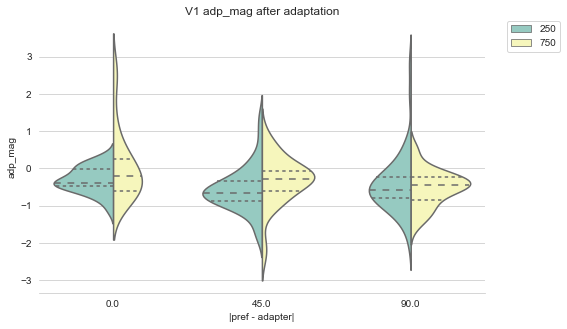

In [78]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
ax = sns.violinplot(data=df_adp_dist_mag[df_adp_dist_mag.area == 'V1'], 
                    x="ori_pref_bin", y="adp_mag", hue="isi", 
                    split=True, inner="quart", palette="Set3")
sns.despine(left=True)
ax.set(xlabel = '|pref - adapter|', ylabel = 'adp_mag', title = 'V1 adp_mag after adaptation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

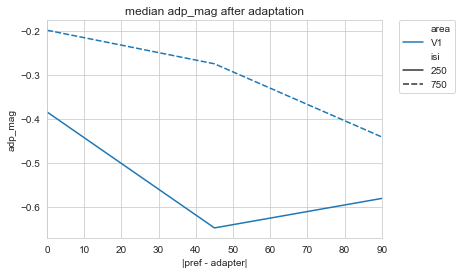

In [79]:
tt = df_adp_dist_mag[['adp_mag','area','isi','ori_pref_bin']].groupby(['area','isi','ori_pref_bin'], sort=False).median().reset_index()

ax = sns.lineplot(data=tt, x="ori_pref_bin", y="adp_mag", hue="area", style="isi");
ax.set(xlabel = '|pref - adapter|', ylabel = 'adp_mag', title = 'median adp_mag after adaptation')
plt.xlim([0,90])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

## Misc
### Adaptation increases variability (?)
for ori=0 target after adaptation, fano factor is higher than adapter  
cell selection: vis_ad only, with thresholding of dfof_ad & dfof_tg0

In [80]:
adp_fano_tg = dfof_tg_std[:,0,[1,2]] / dfof_tg[:,0,[1,2]]
adp_fano_ad = dfof_ad_std / dfof_ad
adp_fano = (adp_fano_tg - adp_fano_ad) / (adp_fano_tg + adp_fano_ad) # range [-1,1], meaning fano factor de/increase after adp
# adp_fano = (adp_fano_tg - adp_fano_ad) / (adp_fano_ad)

df_adp_fano = meta_cell_isi.copy()
df_adp_fano['adp_fano'] = adp_fano.flatten('F')
df_adp_fano['dfof_ad'] = np.concatenate((dfof_ad, dfof_ad), axis=0)
df_adp_fano['dfof_tg'] = np.concatenate((dfof_tg[:,0,1], dfof_tg[:,0,2]), axis=0)

df_adp_fano['vis_ad'] = np.concatenate((vis_ad, vis_ad), axis=0)
df_adp_fano = df_adp_fano[ df_adp_fano['vis_ad'] == 1 ]

df_adp_fano = df_adp_fano[(df_adp_fano.dfof_ad >= dfof_threshold) & (df_adp_fano.dfof_tg >= dfof_threshold)]
df_adp_fano.reset_index()

,index,mouse,area,isi,adp_fano,dfof_ad,dfof_tg,vis_ad
0,1,674,V1,750,0.180281,0.128426,0.036875,1.0
1,4,674,V1,750,0.114951,0.057426,0.049453,1.0
2,5,674,V1,750,-0.416974,0.034737,0.125787,1.0
3,6,674,V1,750,-0.122878,0.098862,0.102231,1.0
4,7,674,V1,750,0.135148,0.334869,0.180029,1.0
...,...,...,...,...,...,...,...,...
491,1146,746,V1,250,-0.286807,0.035885,0.055702,1.0
492,1156,746,V1,250,-0.121457,0.046815,0.035878,1.0
493,1161,746,V1,250,-0.057352,0.050348,0.069806,1.0
494,1165,746,V1,250,0.259160,0.162974,0.087095,1.0


In [81]:
df_adp_fano[['adp_fano','area','isi']].groupby(['area','isi'], sort=False).describe()

adp_fano                                                              \
            count      mean       std       min       25%       50%       75%   
area isi                                                                        
V1   750    275.0 -0.005629  0.259159 -0.766830 -0.176171 -0.029235  0.152613   
     250    221.0  0.070406  0.247551 -0.593292 -0.108514  0.066961  0.236749   

                    
               max  
area isi            
V1   750  0.736222  
     250  0.775551

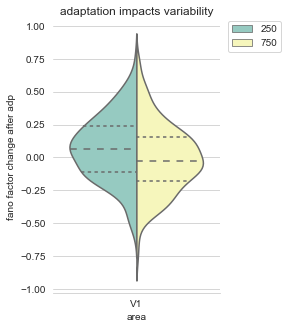

In [83]:
sns.set_style("whitegrid")
plt.figure(figsize=(3,5))
ax = sns.violinplot(data=df_adp_fano, x="area", y="adp_fano", hue="isi",
               split=True, inner="quart", palette="Set3")
sns.despine(left=True)
ax.set(ylabel = 'fano factor change after adp', title = 'adaptation impacts variability')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);